<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем библиотеки pandas, numpy и sklearn для дальнейшей работы:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from numpy.random import RandomState
from sklearn.model_selection import (cross_validate, cross_val_score, cross_val_predict)
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

Запишем в датафреймы данные:

In [2]:
try:
    data_train = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
try:
    data_test = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_test_new.csv')
except:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
try:
    data_full = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_full_new.csv')
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Выгрузим информацию и первые 5 строк датафреймов `data_train`, `data_test` и `data_full`, также проверим данные на предмет дубликатов и пропущенных значений:

In [3]:
def summary (data):
    print('Количество дубликатов:', data.duplicated().sum())
    print('Количество пропущенных значений:', data.isna().sum())
    data.info()
    data.head()
    return data

In [4]:
summary(data_train)

Количество дубликатов: 0
Количество пропущенных значений: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.outp

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
summary(data_test)

Количество дубликатов: 0
Количество пропущенных значений: date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.inp

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [6]:
summary(data_full)

Количество дубликатов: 0
Количество пропущенных значений: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.outp

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Дубликаты во всех датафреймах отсутствуют, типы данных соответствуют описанию. Пропуски в данных требуют дальнейшего исследования.

**Проверим, правильно ли расчитана эффективность обогащения. Вычислим ее на обучающей выборке для признака `rougher.output.recovery`. Найдем MAE между нашими расчетами и значением признака.**

In [7]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_train['rougher_calculation_recovery'] = (C * (F - T)) / (F * (C - T)) * 100
print('Реальный показатель', data_train['rougher.output.recovery'].head())
print()
print('Расчетный показатель', data_train['rougher_calculation_recovery'].head())
print()
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher_calculation_recovery']))

Реальный показатель 0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Расчетный показатель 0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher_calculation_recovery, dtype: float64

MAE: 9.73512347450521e-15


Проверили расчет эффективности обогащения, формулы корректны, средняя абсолютная ошибка равна 9.7

**Проанализируем признаки, недоступные в тестовой выборке.**

In [8]:
data_train.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке на всех этапах недоступны параметры выходного продукта `output` и параметры расчетов `calculation` - на этапе флотации.

**Приступим к предобработке данных.** Наблюдения изменения данных выложены в хронологическом порядке с разницей в 1 час, оставшиеся пропущенные значения мы можем заполнить через методы pandas.bfill() (прямое заполнение) и pandas.ffill() (обратное заполнение). Они будут распространять последнее действительное наблюдение вперед и назад. Проведем эту операцию над всеми датасетами

In [9]:
data_train = data_train.ffill().bfill()
data_test = data_test.ffill().bfill()
data_full = data_full.ffill().bfill()

Теперь отберем признаки, подходящие для обучения модели с помощью корреляционной матрицы (выберем наиболее коррелирующие с целевыми признаками `final.output.recovery`, `rougher.output.recovery`). Удалим признаки, сильно коррелирующие с уже отобранными, такие признаки не повлияют на качество модели, но повысят ее сложность.

In [10]:
model_columns = list(data_test.columns)
input_columns = ['final.output.recovery', 'rougher.output.recovery'] + model_columns

In [11]:
(data_train[input_columns].corr().sort_values(by = 'final.output.recovery', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,final.output.recovery,rougher.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.recovery,1.000000,0.328307,0.384798,0.155639,0.067157,0.214886,0.133526,0.028631,0.148987,0.042755,0.143670,0.028894,0.058578,-0.017229,0.310574,0.205706,0.169602,0.048866,0.261590,0.308561,-0.013655,0.328838,0.019862,0.305498,0.228755,0.093931,-0.148411,-0.084320,-0.183531,-0.093720,-0.179362,-0.094237,-0.130293,-0.094668,-0.092098,-0.092495,0.147045,0.003783,0.122951,0.000455,0.187641,0.031709,0.038290,0.011031,0.209659,0.057357,0.170796,-0.089021,0.098198,0.024159,0.068281,0.043815,-0.027253,-0.035782
primary_cleaner.input.sulfate,0.384798,0.272823,1.000000,0.484178,0.166952,0.261111,0.028847,-0.013909,0.049839,-0.027622,0.049544,-0.001592,0.107193,-0.019518,0.541870,0.558860,0.318932,-0.075122,0.364885,0.606508,0.376819,0.392475,0.488006,0.427297,0.204769,0.073873,-0.227703,-0.219554,-0.253974,-0.221854,-0.291650,-0.221254,-0.262478,-0.225754,-0.238906,-0.226807,0.129323,0.103041,0.138515,0.122921,0.082193,-0.012181,0.003893,-0.040872,0.087795,0.032176,0.110808,-0.064222,-0.006189,-0.030974,0.000540,-0.024671,-0.104186,-0.142148
rougher.input.floatbank10_xanthate,0.328838,0.238468,0.392475,0.370096,0.021669,0.387407,-0.012183,0.235617,0.019102,0.226113,0.021813,0.244902,-0.142091,0.160170,0.147382,0.018927,0.600050,0.076500,0.321101,0.084383,-0.066885,1.000000,0.006038,0.891798,0.118606,-0.068682,-0.101136,-0.354941,-0.165983,-0.361398,-0.120352,-0.357478,0.028249,-0.356682,0.011242,-0.356218,0.131249,0.118027,0.154761,0.108394,-0.030885,-0.136817,-0.080310,0.052191,0.082465,-0.215068,0.001147,-0.364921,-0.129094,-0.150035,-0.148711,-0.159383,-0.294344,0.010429
rougher.output.recovery,0.328307,1.000000,0.272823,0.041395,-0.012795,0.106701,0.087111,0.043377,0.100831,0.039777,0.114148,0.043249,0.005463,0.005309,0.176421,0.173314,0.086685,0.051702,0.184105,0.156173,-0.099457,0.238468,-0.071547,0.216100,0.173309,0.136466,-0.072852,-0.078499,-0.100282,-0.079087,-0.088645,-0.080815,-0.067713,-0.077880,-0.031946,-0.077584,0.157805,-0.020689,0.139664,-0.025590,0.190365,0.006491,0.054296,-0.034223,0.250773,0.051893,0.240501,-0.061388,0.

In [12]:
print(data_train.shape)
print(data_test.shape)

(14149, 88)
(5290, 53)


In [13]:
dropped_columns = ['primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_b_air',
        'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_level',
        'primary_cleaner.state.floatbank8_d_level', 'rougher.input.floatbank10_sulfate',
        'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_c_level',
        'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
        'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air',
        'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank4_b_air',
        'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
        'rougher.state.floatbank10_b_level']
model_columns = [column for column in model_columns if column not in dropped_columns]
input_columns = [column for column in input_columns if column not in dropped_columns]

Признаки, выбранные для удаления относятся к параметрам, характеризующим текущее состояние этапов процесса. Они могут быть напрямую связаны с оставшимися признаками (зависимость друг от друга уровней жидкостей и объемов воздуха в разных floatbank высокая). Возможно, так настроен процесс работы, и лишние признаки можно удалить. Но возможно и нет. Если зависимости между признаками изменятся в будущем (уровни жидкости и объемы газа в разных floatbank станут независимыми), модель может стать неактуальной. Стоит следить за данными параметрами и в случае необходимости обновить модель. Удалим выбранные признаки

In [14]:
data_train = data_train.drop(dropped_columns, axis = 1)
data_test = data_test.drop(dropped_columns, axis = 1)

In [15]:
print(data_train.shape)
print(data_test.shape)

(14149, 69)
(5290, 34)


Дополним тестовую выборку данными из исходной выборки

In [16]:
from_full_to_test = ['date', 
             'rougher.output.recovery', 
             'final.output.recovery', 
             'rougher.output.concentrate_au', 
             'rougher.output.concentrate_ag', 
             'rougher.output.concentrate_pb', 
             'rougher.output.concentrate_sol', 
             'final.output.concentrate_au', 
             'final.output.concentrate_ag', 
             'final.output.concentrate_pb', 
             'final.output.concentrate_sol']
data_test = data_test.merge(data_full[from_full_to_test], on='date', how='left')

Удалим столбец `date`, для построения модели он нам не понадобится

In [17]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)
data_full = data_full.drop('date', axis=1)

**Вывод:**
- мы импортировали библиотеки pandas, numpy и sklearn для дальнейшей работы, изучили данные
- дубликаты в данных не были обнаружены, пропущенные значения были заполнены с помощью методов bfill и ffill
- проверили расчет эффективности обогащения, формулы корректны, средняя абсолютная ошибка равна 9.7
- проанализировали признаки, недоступные в тестовой выборке и выяснили, что в тестовой выборке на всех этапах недоступны параметры выходного продукта output и параметры расчетов calculation - на этапе флотации
- отобрали признаки, подходящие для обучения модели с помощью корреляционной матрицы. Удалили признаки, сильно коррелирующие с уже отобранными. Данные признаки избыточны для модели (некоторые параметры, характеризующие текущее состояние этапов технологического процесса). Они не будут участвовать в построении модели. В случае изменения технологического процесса поведение данных признаков может измениться, следует следить за данными параметрами и при необходимости обновить модель
- избавились от столбца date, при построении модели он нам не пригодится

## Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки**

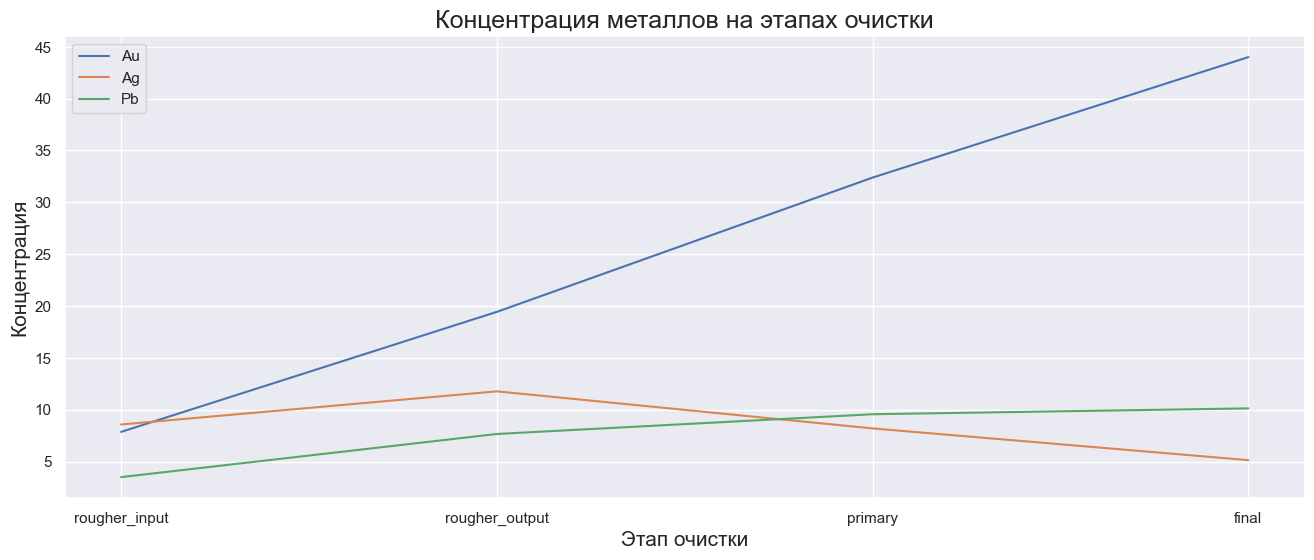

In [18]:
data_train = data_train.set_index(pd.DatetimeIndex(data_train.index))
data_test = data_test.set_index(pd.DatetimeIndex(data_test.index))
data_full = data_full.set_index(pd.DatetimeIndex(data_full.index))
metal_concs = np.array([['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'],])
graf_names = ['rougher_input', 'rougher_output', 'primary', 'final']
metals = ['Au', 'Ag', 'Pb']
sns.set()
f, axes = plt.subplots(1, 1, figsize=(16, 6))
axes.set_title('Концентрация металлов на этапах очистки', fontsize=18)
axes.set_ylabel('Концентрация', fontsize=15)
axes.set_xlabel('Этап очистки', fontsize=15)
for cols, metal in zip(metal_concs, metals):
    sns.lineplot(data = pd.Series(data_train[cols].mean().values, index=graf_names),
                legend = 'full',
                label = metal)
plt.gca();

Из графика следует вывод о том, что с каждым этапом очистки концентрация золота в смеси стремительно растет, концентрация серебра падает, а концентрация свинца немного растет. При этом стоит отметить, что концентрация серебра до очистки (исходное сырье) выше и падает в процессе очистки

**Сравним распределение размеров гранул сырья на обучающей и тестовой выборках**

In [19]:
data_train.filter(like='feed_size').describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,14149.000000,14149.000000
mean,7.322310,60.239856
std,0.614062,23.005310
min,1.080000,9.659576
25%,6.960000,48.966751
50%,7.290000,55.269784
75%,7.700000,66.007526
max,10.470000,484.967466


In [20]:
data_test.filter(like='feed_size').describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,5290.000000,5290.000000
mean,7.266339,55.952754
std,0.610219,19.080334
min,5.650000,0.046369
25%,6.890000,43.906504
50%,7.250000,50.846843
75%,7.600000,62.451165
max,15.500000,392.494040


Построим графики распредения размера гранул сырья и вычислим 95%-й доверительный интервал

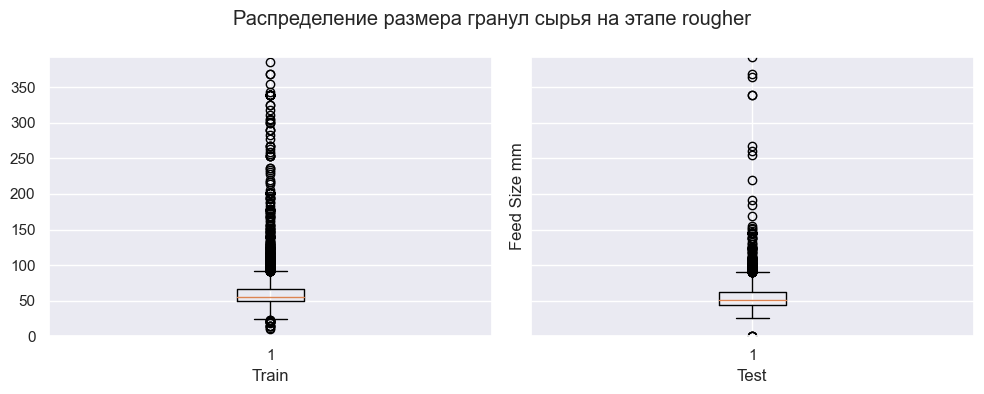

Средний размер гранул:
Train: 60.23985599255736 | Test: 55.95275402889511
95%-й доверительный интервал:
Train: 40.07817371154805 , 97.49382725093666 | Test: 39.720037912895954 , 94.18724815142866


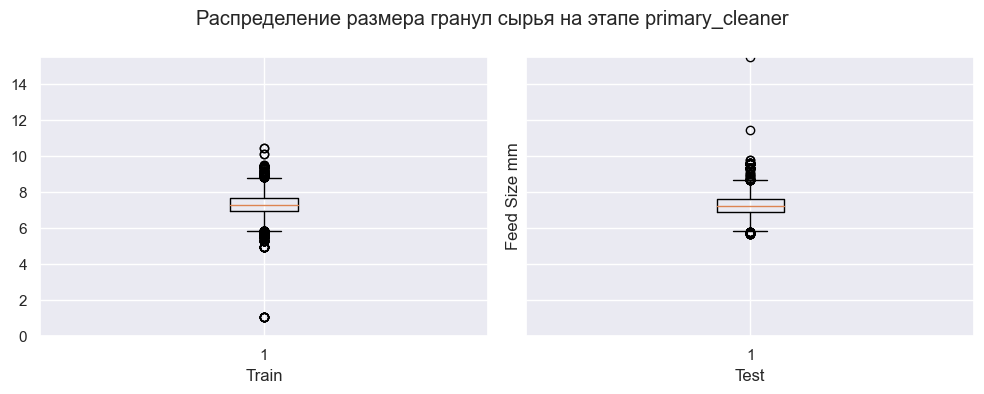

Средний размер гранул:
Train: 7.322309906901298 | Test: 7.266339191270909
95%-й доверительный интервал:
Train: 6.149999909502604 , 8.520000457763674 | Test: 6.0 , 8.510000228881836


In [21]:
for phase in ['rougher', 'primary_cleaner']:
    fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, tight_layout=True)
    fig.suptitle(f'Распределение размера гранул сырья на этапе {phase}')
    column = phase + '.input.feed_size'
    ax[0].boxplot(data_train[column])
    ax[1].boxplot(data_test[column])
    plt.ylim(0, data_test[column].max())
    ax[0].set(xlabel='Train')
    ax[1].set(xlabel='Test')
    plt.ylabel('Feed Size mm')
    plt.show()
    print ('Средний размер гранул:')
    print ('Train:', data_train[column].mean(), end=' | ')
    print ('Test:', data_test[column].mean())
    print ('95%-й доверительный интервал:')
    print ('Train:', np.quantile(data_train[column], 0.025), ',', np.quantile(data_train[column], 0.975), end=' | ')
    print ('Test:' , np.quantile(data_test[column], 0.025), ',', np.quantile(data_test[column], 0.975))

C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

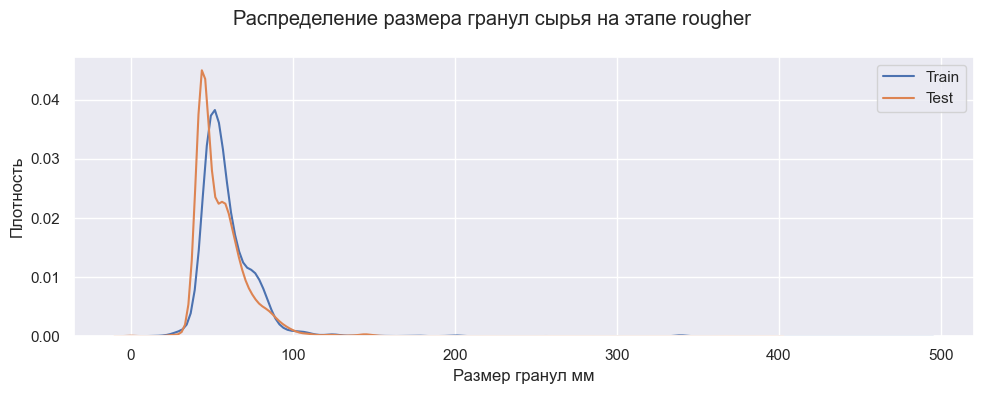

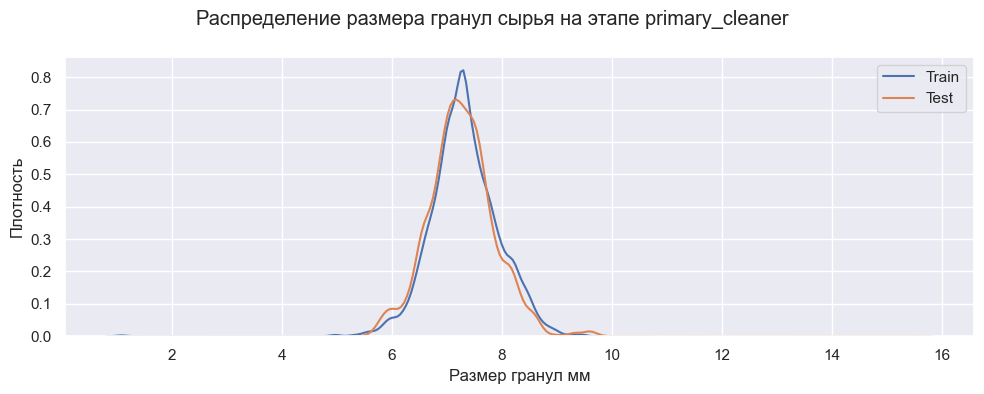

In [22]:
for phase in ['rougher', 'primary_cleaner']:
    fig = plt.figure(figsize=(10, 4), tight_layout=True)
    fig.suptitle(f'Распределение размера гранул сырья на этапе {phase}')
    column = phase + '.input.feed_size'
    sns.distplot(data_train[column], kde=True, hist=False)
    sns.distplot(data_test[column], kde=True, hist=False)
    plt.legend(['Train', 'Test'])
    plt.xlabel('Размер гранул мм')
    plt.ylabel('Плотность')

На графиках видно, что распределение размера гранул сырья на этапах в обучающей и тестовой выборках не отличается с точки зрения статистической значимости. Из этого следует вывод о том, что оценка модели будет верной.

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

Напишем функции расчета суммарной концентрации в сырье, черновом и финальном концентратах

In [23]:
def feed_concentr(data):  
    return (data['rougher.input.feed_au'] + data['rougher.input.feed_ag'] + 
            data['rougher.input.feed_pb'] + data['rougher.input.feed_sol'])
def rougher_concentr(data):
    return (data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag'] + 
            data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol'])
def final_concentr(data):  
    return (data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + 
            data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'])

Добавим в тренировочную и исходную выборки данные о суммарных концентрациях на 3-х стадиях

In [24]:
data_train['rougher.input.feed_sum'] = feed_concentr(data_train)
data_train['rougher.output.concentrate_sum'] = rougher_concentr(data_train)
data_train['final.output.concentrate_sum'] = final_concentr(data_train)

data_full['rougher.input.feed_sum'] = feed_concentr(data_full)
data_full['rougher.output.concentrate_sum'] = rougher_concentr(data_full)
data_full['final.output.concentrate_sum'] = final_concentr(data_full)

data_test['rougher.input.feed_sum'] = feed_concentr(data_test)
data_test['rougher.output.concentrate_sum'] = rougher_concentr(data_test)
data_test['final.output.concentrate_sum'] = final_concentr(data_test)

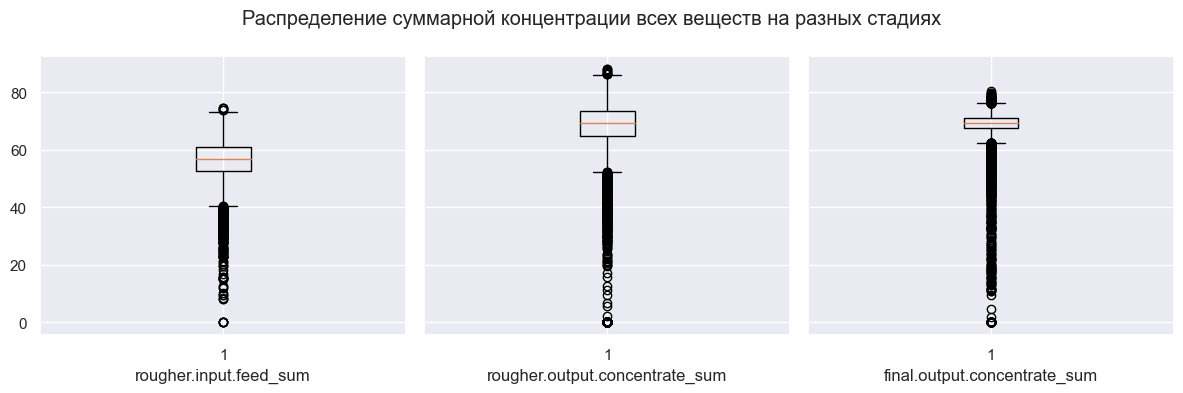

In [25]:
phases_sum_list = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'final.output.concentrate_sum']
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, tight_layout=True)
fig.suptitle('Распределение суммарной концентрации всех веществ на разных стадиях')
i = 0
for phase in phases_sum_list:
    ax[i].boxplot(data_train[phase])
    ax[i].set(xlabel=phase)
    i += 1

C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

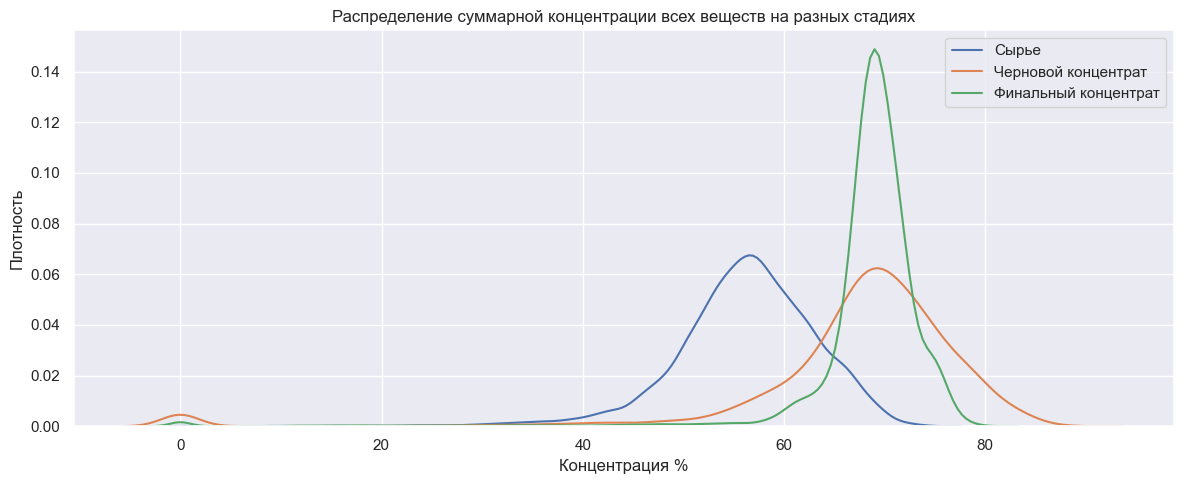

In [26]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
for phase in phases_sum_list:
    sns.distplot(data_train[phase], kde=True, hist=False)
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'])
plt.title('Распределение суммарной концентрации всех веществ на разных стадиях')
plt.xlabel('Концентрация %')
plt.ylabel('Плотность')
plt.show()


На всех стадиях присутствуют аномальные нулевые значения суммарной концетрации, удалим все объекты, у которых хотя бы одно значение суммарной концентрации меньше 30, для правильной работы модели.

In [27]:
before_full = len(data_full)
data_full = data_full[(data_full['rougher.input.feed_sum'] > 30) &
                  (data_full['rougher.output.concentrate_sum'] > 30) &
                  (data_full['final.output.concentrate_sum'] > 30)]

before_train = len(data_train)
data_train = data_train[(data_train['rougher.input.feed_sum'] > 30) &
                  (data_train['rougher.output.concentrate_sum'] > 30) &
                  (data_train['final.output.concentrate_sum'] > 30)]

before_test = len(data_test)
data_test = data_test[(data_test['rougher.input.feed_sum'] > 30) &
                  (data_test['rougher.output.concentrate_sum'] > 30) &
                  (data_test['final.output.concentrate_sum'] > 30)]

In [28]:
print('Удалено объектов исходной выборки:', (before_full - len(data_full)))
print('Удалено объектов тренировочной выборки:', (before_train - len(data_train)))
print('Удалено объектов тестовой выборки:', (before_test - len(data_test)))

Удалено объектов исходной выборки: 671
Удалено объектов тренировочной выборки: 495
Удалено объектов тестовой выборки: 176


In [29]:
sum_columns = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum','final.output.concentrate_sum']
data_full = data_full.drop(sum_columns,axis=1)
data_train = data_train.drop(sum_columns,axis=1)
data_test = data_test.drop(sum_columns,axis=1)
data_full.reset_index(drop= True , inplace= True )
data_train.reset_index(drop= True , inplace= True )
data_test.reset_index(drop= True , inplace= True )

**Вывод:**
- проверили, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, для этого построили графики и выяснили, что с каждым этапом очистки концентрация золота в смеси стремительно растет, концентрация серебра падает, а концентрация свинца немного растет
- сравнили распределение размеров гранул сырья на обучающей и тестовой выборках, с помощью графиков распредения размера гранул сырья, вычислили 95%-й доверительный интервал и выяснили, что распределение размера гранул сырья на этапах в обучающей и тестовой выборках не отличается с точки зрения статистической значимости. Из этого следует вывод о том, что оценка модели будет верной
- исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах, выяснили, что на всех стадиях присутствуют аномальные нулевые значения суммарной концетрации, удалили все объекты, у которых хотя бы одно значение суммарной концентрации меньше 30, что сделает работу модели корректной

## Модель

**Напишем функцию для вычисления итоговой sMAPE.**

In [30]:
def smape(target_true, target_pred):       
    error = abs(target_true - target_pred)
    scale = (abs(target_true) + abs(target_pred)) / 2
    return (error / scale).mean() * 100

In [31]:
def final_smape(target_true, target_pred):
    target_true.reset_index(drop=True, inplace=True)
    target_pred = pd.DataFrame(data=target_pred)
    smape_rougher = smape(target_true.iloc[:, 0], target_pred.iloc[:, 0])
    smape_final = smape(target_true.iloc[:, 1], target_pred.iloc[:, 1])
    return 0.25 * smape_rougher + 0.75 * smape_final 

Создадим скорер на основе функции вычисления итоговой sMAPE и напишем функцию расчета итогового sMAPE на кросс-валидации

In [32]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)
def cross_validation_smape(model, features, target):
    return np.abs(np.average(cross_validate(model, features, target, scoring=smape_scorer, n_jobs=-1)['test_score']))

**Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим ее на тестовой выборке**

Выделим признаки и целевой признак в обучающей и тестовой выборках

In [33]:
data_train = data_train.loc[:, list(data_test.columns)]
numeric = ['rougher.output.recovery', 'final.output.recovery']
features_train = data_train.drop(numeric, axis=1)
target_train = data_train[numeric]
features_test = data_test.drop(numeric, axis=1)
target_test = data_test[numeric]

Масштабируем признаки на обучающей и тестовой выборках с помощью метода `StandardScaler`

In [34]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)
display('Features Train', features_train.head())
print()
display('Features Test', features_test.tail())
print()
display('Target Train', target_train.sample(5))
print()
display('Target Test', target_test.sample(5))

'Features Train'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.179068,0.373081,-0.123839,0.277105,-0.447430,-0.811578,0.050454,-1.337888,-1.132485,0.464135,...,-0.962268,-2.699847,-0.050386,-0.273467,-0.514897,-0.220783,-0.672287,0.666164,-0.224256,-1.306999
1,-0.216547,0.422954,-0.123839,0.314093,-0.242813,-0.321345,0.122311,-1.305303,-1.149914,0.481241,...,-0.988970,-2.534815,0.060175,-0.217810,-0.392870,-0.212064,-0.513828,0.646337,-0.169380,-1.395548
2,-0.262908,0.725845,-0.123839,0.283773,-0.045960,-0.343337,0.211855,-1.329263,-1.248152,0.527687,...,-0.983680,-2.579520,-0.074735,-0.179179,-0.435420,-0.353598,-0.527550,0.666562,0.000204,-1.350846
3,-0.302612,0.727585,-0.123839,0.298333,-0.058268,-0.315748,0.215100,-1.368507,-1.360611,0.650900,...,-0.987714,-2.540510,-0.253735,-0.073134,-0.463718,-0.379631,-0.517500,0.660508,-0.163792,-1.537183
4,-0.412325,0.903218,-0.123839,0.333264,-0.047638,-0.334903,0.222960,-1.359061,-1.592269,0.630713,...,-0.989268,-2.581410,-0.298752,0.166722,-0.419373,-0.448953,-0.491281,0.737140,-0.049266,-1.508518


'Features Test'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
5109,1.021714,2.105774,1.208565,0.032208,-1.593723,-0.301410,-0.499886,1.633653,1.092771,0.445882,...,-1.863600,0.191671,-1.104730,0.712759,-0.409808,0.091633,0.636283,-0.137474,-0.348402,0.587208
5110,0.994875,2.117416,1.208565,0.031723,-1.243698,0.683659,-0.330822,1.472225,0.892507,0.529346,...,-1.863659,0.187641,-1.009755,0.636507,-0.523389,0.156209,0.716189,-0.170599,-0.336148,0.182741
5111,0.949408,2.114762,1.208565,0.748599,-0.842382,-0.192409,-0.134557,1.444228,0.825064,0.687348,...,-1.864496,0.245257,-0.296395,0.895411,-0.437765,0.715527,0.927600,-0.305508,-0.273186,-0.331806
5112,1.168767,1.950051,1.208565,1.639973,-0.845250,-0.894488,-0.134187,1.446268,0.767975,0.697396,...,-1.859151,0.180812,-0.137167,0.922527,-0.519578,0.936468,1.214051,-0.539692,-0.511991,-0.257009
5113,1.216416,1.818467,1.208565,1.965552,-0.848118,-0.477894,-0.144958,1.239675,0.534503,0.866165,...,-1.863345,0.164168,-0.072074,0.851842,-0.589856,0.911433,1.045020,-0.439138,-0.554036,-0.129526


'Target Train'

,rougher.output.recovery,final.output.recovery
5599,92.387367,75.352290
2750,74.791184,63.935109
2970,77.080385,64.947739
4535,83.778074,63.739485
11536,68.741859,45.922496


'Target Test'

,rougher.output.recovery,final.output.recovery
469,84.900300,67.636669
4468,94.350274,69.037935
2123,89.889343,70.825217
935,90.783240,70.360241
5096,94.162318,71.091343


Проведем обучение и скоринг регрессионных моделей для подбора гиперпараметров и выбора лучшей модели

In [35]:
cv = 5
models = [DecisionTreeRegressor(random_state = 12345), 
          RandomForestRegressor(random_state = 12345), 
          LinearRegression()]
results_cross_validation = []
for model in models:
    scorer = make_scorer(smape, greater_is_better=False)
    cross_validation_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_train.iloc[:, 0], 
                                              cv=cv, scoring=scorer).mean()
    cross_validation_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_train.iloc[:, 1], 
                                            cv=cv, scoring=scorer).mean()
    total_score = 0.25 * cross_validation_score_rougher + 0.75 * cross_validation_score_final    
    results_cross_validation.append({'model_name': model.__class__.__name__, 
                              'cross_validation_score_rougher': cross_validation_score_rougher, 
                              'cross_validation_score_final': cross_validation_score_final,
                              'total_score': total_score}) 
              
pd.DataFrame(results_cross_validation)

,model_name,cross_validation_score_rougher,cross_validation_score_final,total_score
0,DecisionTreeRegressor,-10.340855,-16.148491,-14.696582
1,RandomForestRegressor,-6.732937,-9.811546,-9.041894
2,LinearRegression,-5.798671,-10.549234,-9.361593


Дерево решений:

In [36]:
state = RandomState(12345)
print('Desicion Tree')
for depth in range(50, 200, 50):
        for leaf in range(2,8):
            model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf, random_state=state)
            model.fit(features_train, target_train)
            print('depth =', depth, 'min_samples_leaf=', leaf, ':', cross_validation_smape(model, features_train, target_train))

Desicion Tree
depth = 50 min_samples_leaf= 2 : 13.658559553831552
depth = 50 min_samples_leaf= 3 : 13.144453133342893
depth = 50 min_samples_leaf= 4 : 12.809416654016747
depth = 50 min_samples_leaf= 5 : 12.13245466376552
depth = 50 min_samples_leaf= 6 : 12.096039080827834
depth = 50 min_samples_leaf= 7 : 11.949167304007172
depth = 100 min_samples_leaf= 2 : 14.02723099607336
depth = 100 min_samples_leaf= 3 : 13.411553295119727
depth = 100 min_samples_leaf= 4 : 12.82908530385193
depth = 100 min_samples_leaf= 5 : 12.10279321066651
depth = 100 min_samples_leaf= 6 : 12.12230377074769
depth = 100 min_samples_leaf= 7 : 11.983542266383418
depth = 150 min_samples_leaf= 2 : 13.617693753982559
depth = 150 min_samples_leaf= 3 : 13.89745643871297
depth = 150 min_samples_leaf= 4 : 12.995343630517866
depth = 150 min_samples_leaf= 5 : 12.534782325018309
depth = 150 min_samples_leaf= 6 : 12.348144286599638
depth = 150 min_samples_leaf= 7 : 11.858790607505812


Случайный лес:

In [37]:
print('Random Forest')
for estimators in range(10, 51, 10):
    for depth in range(2,8,2):
        model = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=state)
        model.fit(features_train, target_train)
        print('estimators =', estimators, 'depth=', depth, ':', cross_validation_smape(model, features_train, target_train))

Random Forest
estimators = 10 depth= 2 : 8.914513637116638
estimators = 10 depth= 4 : 9.059082551044138
estimators = 10 depth= 6 : 9.520957882657653
estimators = 20 depth= 2 : 8.894777007781027
estimators = 20 depth= 4 : 8.999354618782645
estimators = 20 depth= 6 : 9.341308784431865
estimators = 30 depth= 2 : 8.975962707485852
estimators = 30 depth= 4 : 8.973105329869156
estimators = 30 depth= 6 : 9.119520726204717
estimators = 40 depth= 2 : 8.951502099062228
estimators = 40 depth= 4 : 8.989253462438992
estimators = 40 depth= 6 : 9.235958409826875
estimators = 50 depth= 2 : 8.930397494459154
estimators = 50 depth= 4 : 8.989659358735647
estimators = 50 depth= 6 : 9.273878275399714


Линейная регрессия:

In [38]:
model = LinearRegression()
model.fit(features_train, target_train)
print('Linear Regression:', cross_validation_smape(model, features_train, target_train))

Linear Regression: 9.36159304344945


Лучший результат показала модель случайного леса с 20 деревьями и глубиной 2, оценим ее качество на тестовой выборке

In [39]:
model = RandomForestRegressor(n_estimators=50, max_depth=2, random_state=state)
model.fit(features_train, target_train)
predict_test = model.predict(features_test)
print('final sMAPE:', final_smape(target_test, predict_test))

final sMAPE: 7.333321253737666


Проверим результат с помощью константной модели

In [40]:
target_test_const = pd.DataFrame(index=range(target_test.shape[0]))
target_test_const[0] = target_train.mean()[0]
target_test_const[1] = target_train.mean()[1]
display(target_test_const.head())
print('sMAPE константной модели:', final_smape(target_test, target_test_const))

,0,1
0,84.596029,66.883912
1,84.596029,66.883912
2,84.596029,66.883912
3,84.596029,66.883912
4,84.596029,66.883912


sMAPE константной модели: 7.557096025788899


**Вывод:**
- мы написали функцию для вычисления итоговой sMAPE, создали скорер на основе функции вычисления итоговой sMAPE и функцию расчета итогового sMAPE на кросс-валидации
- обучили разные модели(дерево решений, случайный лес и линейная регрессия), оценили их качество кросс-валидацией, масштабировали признаки на обучающей и тестовой выборках с помощью метода StandardScaler()
- провели обучение и скоринг регрессионных моделей для подбора гиперпараметров и выбора лучшей модели
- лучший результат sMAPE показала модель случайного леса с 20 деревьями и глубиной 2 (обучающая выборка - 8.89%, тестовая выборка 7.29%)
- sMAPE константной модели показывает практически такой же результат как и модель случайного леса (7.5%)

**Вывод по проекту:**
- изучили данные, дубликаты в данных не были обнаружены, пропущенные значения были заполнены с помощью методов bfill и ffill
- проверили расчет эффективности обогащения, формулы корректны, средняя абсолютная ошибка равна 9.7
- проанализировали признаки, недоступные в тестовой выборке и выяснили, что в тестовой выборке на всех этапах недоступны параметры выходного продукта output и параметры расчетов calculation - на этапе флотации
- отобрали признаки, подходящие для обучения модели с помощью корреляционной матрицы. Удалили признаки, сильно коррелирующие с уже отобранными, избавились от столбца date, при построении модели он нам не пригодится
- проверили, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, для этого построили графики и выяснили, что с каждым этапом очистки концентрация золота в смеси стремительно растет, концентрация серебра падает, а концентрация свинца немного растет
- сравнили распределение размеров гранул сырья на обучающей и тестовой выборках, с помощью графиков распредения размера гранул сырья, вычислили 95%-й доверительный интервал и выяснили, что распределение размера гранул сырья на этапах в обучающей и тестовой выборках не отличается с точки зрения статистической значимости. Из этого следует вывод о том, что оценка модели будет верной
- исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах, выяснили, что на всех стадиях присутствуют аномальные нулевые значения суммарной концетрации, удалили все объекты, у которых хотя бы одно значение суммарной концентрации меньше 30, что сделает работу модели корректной
- написали функцию для вычисления итоговой sMAPE, создали скорер на основе функции вычисления итоговой sMAPE и функцию расчета итогового sMAPE на кросс-валидации
- обучили разные модели(дерево решений, случайный лес и линейная регрессия), оценили их качество кросс-валидацией, масштабировали признаки на обучающей и тестовой выборках с помощью метода StandardScaler()
- провели обучение и скоринг регрессионных моделей для подбора гиперпараметров и выбора лучшей модели
- лучший результат sMAPE показала модель случайного леса с 50 деревьями (обучающая выборка - 9.3%, тестовая выборка 6.7%), sMAPE константной модели оказался немного хуже модели случайного леса (7.5%)